# Book Rating Group Project

## Authors: Kheirie Kaderi, Mohamed Al Jalanji, Clemence ROLDAN

# 1. Importing Libraries

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading the Data

In [46]:
### Clemence ###
# df = pd.read_csv("books.csv",sep=",",index_col="bookID")
# # note : I had to modify 4 lines in the csv file for it to work, there were comas in 4 authors names
# print(df.head(10))

In [3]:
### Kheirie ###
# Specify the filename
filename = 'books.csv'
updated_filename = "books_updated.csv"

## In some cases in certain fields such us author the authors are separated by ", " 
## to avoid problems when reading the csv directly using pandas and to retain all rows the following steps done

# Open the file and read lines
with open(filename, 'r', encoding='utf-8') as file: # utf-8 encoding to support all languages since there are non-english content
    lines = file.readlines()

# Process the lines to handle unwanted delimiters
cleaned_lines = []
is_firstline = True # used to avoid updating the first line

for line in lines:
    
    if is_firstline: # if it is the first line i.e. Header do not update it
        is_firstline = False
        cleaned_lines.append(line)
        continue
    cleaned_line = line.replace(', ', '/')

    # Append the cleaned line
    cleaned_lines.append(cleaned_line)

# rejoin all the lines to create a new updated csv
with open(updated_filename, 'w', encoding='utf-8') as output_file:
    for cleaned_line in cleaned_lines:
        output_file.write(cleaned_line + '\n')
        
# Read the cleaned data into a DataFrame
df = pd.read_csv(updated_filename, delimiter = ",", encoding = 'utf-8', index_col=False) 
# Note: Did not use BookID as an index this can cause potential problems when navigating and updating the DataFrame
#       since the numbers do not follow eachother - between one row and another there can be numbers skipped 


## General Look at the Data

In [3]:
### Kheirie ###
# Check the first 5 rows
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
### Kheirie ###
# Check the last 5 rows
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [5]:
### Kheirie ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  object 
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  object 
 10  publication_date    11127 non-null  object 
 11  publisher           11126 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.0+ MB


In [6]:
### Kheirie ###
# .sample() is important to see random content of the DataFrame
df.sample(5) 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1310,4605,Moo,Jane Smiley,3.46,2743604913,9782743604912,fre,482,6441,492,6/1/1999,Rivages
4167,14926,Emma,Jane Austen/James Kinsley/Adela Pinch,4.00,0192802372,9780192802378,eng,402,737,72,7/10/2003,Oxford University Press
5364,19379,Mark Twain's Own Autobiography: The Chapters f...,Mark Twain/Michael J. Kiskis,3.80,0299125408,9780299125400,eng,301,9,1,10/1/1990,University of Wisconsin Press
1317,4625,The Complete Short Stories of Ernest Hemingway,Ernest Hemingway/John Hemingway/Patrick Heming...,4.29,0684843323,9780684843322,eng,650,30081,649,8/3/1998,Scribner
352,1197,Tyler Florence's Real Kitchen: An Indespensibl...,Tyler Florence/JoAnn Cianciulli/Bill Bettencou...,4.06,0609609971,9780609609972,eng,304,1426,16,3/25/2003,Clarkson Potter Publishers


In [4]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
### Kheirie ###
# Remove the space before the column num_pages, for ease of use
df.rename(columns={'  num_pages': '  num_pages'.replace(' ', '')}, inplace=True)
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [9]:
### Clemence ###
types_columns=df.dtypes
number_lines,number_columns=df.shape
print(types_columns)

bookID                 object
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                 object
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count     object
publication_date       object
publisher              object
dtype: object


In [10]:
### Clemence ###
print('Out of ',number_columns, 'columns only 5 are of numerical types')

Out of  12 columns only 5 are of numerical types


# 3. Data Analysis and Data Cleaning

In [6]:
### Kheirie ###
# investigate if their are non-numerical non-date types in supposedly numerical and date columns

# text_reviews_count 
# Filter the DataFrame to get non-numerical values in the specified column
def check_non_numerical_date(columns_list: list, intended_type: str):
    
    if intended_type == "numerical":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_numeric, errors='coerce').notna()]
            print("The non_numerical_values in column {} : ".format(column), non_numerical_values[column])

    elif intended_type == "date":
        for column in columns_list:
            non_numerical_values = df.loc[~df[column].apply(pd.to_datetime, errors='coerce').notna()]
            print("The non_date_values in column {} : ".format(column), non_numerical_values[column])
    
# Display the non-numerical and non_date values of the selected columns
columns = ["isbn", "isbn13", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")
check_non_numerical_date(["publication_date"], "date")

The non_numerical_values in column isbn :  3        043965548X
12       076790818X
16       076790382X
27       097669400X
40       006076273X
            ...    
11090    030727411X
11101    074347788X
11106    057305133X
11110    843221728X
11115    972233168X
Name: isbn, Length: 985, dtype: object
The non_numerical_values in column isbn13 :  1847    en-US
Name: isbn13, dtype: object
The non_numerical_values in column text_reviews_count :  1847    9/1/2003
Name: text_reviews_count, dtype: object
The non_date_values in column publication_date :  1847      MTV Books
8180     11/31/2000
11098     6/31/1982
Name: publication_date, dtype: object


-- Kheirie --

From the above investigation one can notice the following : 
- isbn is not numerical since some of the isbn codes end with X 
- we notice that at index location 1847 the data is shifted to the left
- dates at index locations 8180 and 11098 were not considered as dates since they are wrong. June and November are 31 days, but in reality they are only 30 days. 

In [7]:
### Clemence ###
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             1
dtype: int64

--- Kheirie ---

There is one empty cell in publisher column, I assume it is on index location 1847. Lets investiagte this row.

In [8]:
### Kheirie ###
df.iloc[1847]

bookID                6549/ said the shotgun to the head.
title                                       Saul Williams
authors                                              4.22
average_rating                                743470796.0
isbn                                        9780743470797
isbn13                                              en-US
language_code                                         192
num_pages                                            2762
ratings_count                                         214
text_reviews_count                               9/1/2003
publication_date                                MTV Books
publisher                                             NaN
Name: 1847, dtype: object

--- Kheirie --- 

We notice that there is a / in the bookID which separates the BookID from the book title. This must be a result from updating automatically the csv files at the beginning. 
Below is the code to fix this unwanted mistake

In [9]:
### Kheirie ###
# Split 'bookID' by "/" to create a list containing bookID and title content
bookid_title = df["bookID"].iloc[1847].split('/')


# content of the remaining columns
remaining_columns = df[['title', 'authors', 'average_rating', 'isbn', 'isbn13',
                                   'language_code', 'num_pages', 'ratings_count', 
                                   'text_reviews_count', 'publication_date']].iloc[1847]


# rearrange cells content for each column
df.iloc[1847, 2:] = remaining_columns
df["bookID"].iloc[1847]= bookid_title[0]
df["title"].iloc[1847]= bookid_title[1]


C:\Users\kader\AppData\Local\Temp\ipykernel_9260\1078055645.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.22' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_9260\1078055645.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[1847, 2:] = remaining_columns
C:\Users\kader\AppData\Local\Temp\ipykernel_9260\1078055645.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bookID"].iloc[1847]= bookid_title[0]
C:\Users\kader\AppData

In [10]:
### Kheirie ###
# rechek the content 
df.iloc[1847]

bookID                                          6549
title                  said the shotgun to the head.
authors                                Saul Williams
average_rating                                  4.22
isbn                                     743470796.0
isbn13                                 9780743470797
language_code                                  en-US
num_pages                                        192
ratings_count                                   2762
text_reviews_count                               214
publication_date                            9/1/2003
publisher                                  MTV Books
Name: 1847, dtype: object

In [11]:
### Kheirie ###
# Check the types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  object
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  object
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.0+ MB


--- Kheirie ---

For some reasons the supposedly numerical columns became objects 
Re-investigate again if they contain non-numerical content

In [12]:
### Kheirie ###
# re-investigate if there is non-numerical content in supposedly numerical columns
columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]
check_non_numerical_date(columns, "numerical")

The non_numerical_values in column average_rating :  Series([], Name: average_rating, dtype: object)
The non_numerical_values in column isbn13 :  Series([], Name: isbn13, dtype: object)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)
The non_numerical_values in column num_pages :  Series([], Name: num_pages, dtype: object)
The non_numerical_values in column ratings_count :  Series([], Name: ratings_count, dtype: int64)
The non_numerical_values in column text_reviews_count :  Series([], Name: text_reviews_count, dtype: object)


--- Kheirie --- 

They do not contain non-numerical content, so will transform them to numerical

In [13]:
# convert to numerical
def convert_to_numerical(columns_list: list):
    
    for column in columns_list:
        df[column] = df[column].apply(pd.to_numeric)

columns = ["average_rating", "isbn13", "text_reviews_count", "num_pages", "ratings_count", "text_reviews_count"]

convert_to_numerical(columns)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  object 
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [14]:
### Kheirie ### 
# fix the dates by replacing 31 with 30 in June and November
# convert the date column to type pd.datetime
df["publication_date"].iloc[8180] = '11/30/2000'
df["publication_date"].iloc[11098] = '6/30/1982'
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', utc=False)

C:\Users\kader\AppData\Local\Temp\ipykernel_9260\3143718195.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[8180] = '11/30/2000'
C:\Users\kader\AppData\Local\Temp\ipykernel_9260\3143718195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["publication_date"].iloc[11098] = '6/30/1982'


In [15]:
df.sample(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
3671,13275,Poetics of Music in the Form of Six Lessons,Igor Stravinsky/George Seferis/Arthur Knodel/I...,4.11,0674678567,9780674678569,eng,160,988,31,1970-02-26,Harvard University Press
8776,33824,The Talbot Odyssey,Nelson DeMille,3.85,0751531200,9780751531206,eng,640,28,1,2000-11-02,Sphere
5931,22296,Haunted,Chuck Palahniuk,3.59,0224064452,9780224064453,eng,416,173,15,2005-05-01,Jonathan Cape
5444,19620,What Life Was Like in the Time of War and Peac...,Time-Life Books,3.75,0783554591,9780783554594,eng,144,47,7,1999-09-01,Time Life Medical
8537,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,2011-09-01,Collector's Library


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11127 non-null  object        
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11127 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  int64         
 6   language_code       11127 non-null  object        
 7   num_pages           11127 non-null  int64         
 8   ratings_count       11127 non-null  int64         
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11127 non-null  datetime64[ns]
 11  publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [16]:
### Clemence ###
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,2000-08-27 23:01:53.561606912
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,1998-07-16 12:00:00
50%,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,2003-03-01 00:00:00
75%,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,2005-09-30 00:00:00
max,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,NaN


--- Clemence ---

We see above the description of those 5 numerical columns : 
- The first one is the "average_rating", it's the target column. It's made of float, that goes from 0 to 5, with a mean at 3,9.
- The second one is the isbn13 (International Standard Book Number). It's made of integer but it's a number used to identify books, the numerical values don't have valid informations.
- The num_pages refer to the number of page, we see that the min is 0 : we should investigate it.
- the ratings_count and the text_reviews_count are the number of ratings and the number of text_reviews the book received in goodreads : we see that there is far more ratings than text_reviews, which seems normal. We see that the mean and the median are really different for those columns, we should investigate it.

In [ ]:
### Note: Clemence : I changed some thing here so Kheirie, it's better if you start here ###

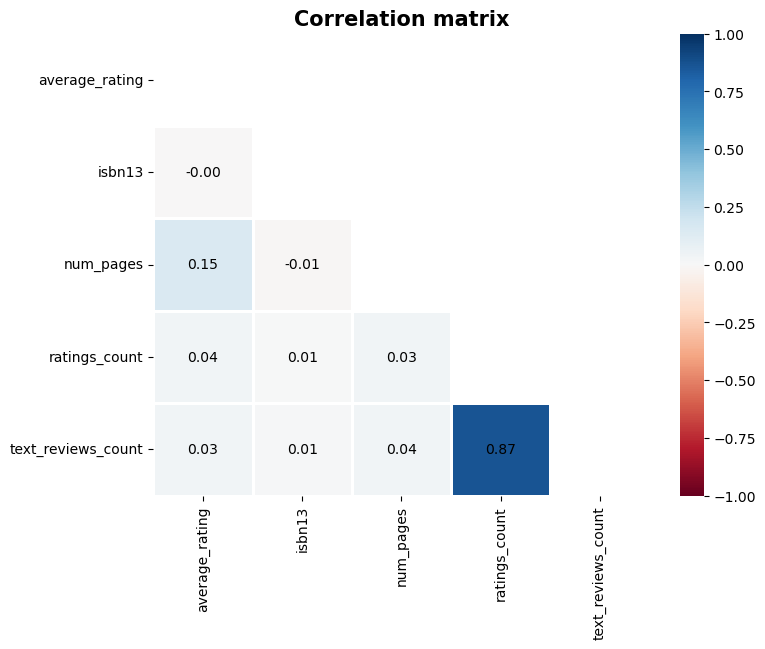

In [17]:
### Clemence ###
#Creation of a correlation matrix, to see the link between average_rating and all the numerical columns
### Note by Kheirie : This was giving me an error because of columns of string values - so I did some updates ###
# matrix=df.corr()
numeric_columns = df.select_dtypes(include=['number']) # Kheirie added this to avoid error due to columns of string type
matrix = numeric_columns.corr()
# mask=np.tril(np.ones_like(matrix,dtype=bool))

# Kheirie Updated the plot for better readability - did manual annotations since before only the annotation (i.e. corr values) of the upper row were visible

# Create a mask to hide the upper triangle 
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap without annotations
sns.heatmap(matrix, mask=mask, center=0, cmap='RdBu', linewidths=1, annot=False, vmin=-1, vmax=1, ax=ax)

# Manually annotate the heatmap
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if mask[i, j] == False:
            ax.text(j + 0.5, i + 0.5, f"{matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)
            
plt.title('Correlation matrix', fontsize=15, fontweight='bold')
plt.show()

--- Kheirie --- 

We notice that the two features which are very highly correlated are the ratings_count and the test_reviews_count at a correlation of 0.87
Other features are not very correlated. The average_rating and the num_pages are slightly correlated at a correlation of 0.15

## Analysing Different Features

### The Target - average_rating

--- Kheirie --- 

 Start by looking at our target, the average_rating. 

A histogram is used to see how the data is distributed

C:\Users\kader\AppData\Local\Temp\ipykernel_9260\597360136.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], hist=True, kde=True,
c:\Users\kader\anaconda3\envs\book-rating_prediction\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


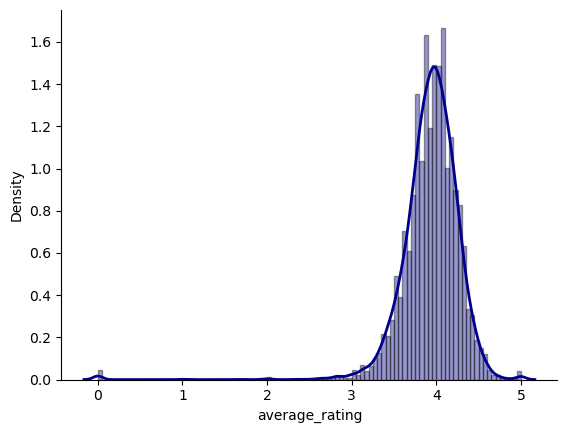

In [52]:
### Kheirie ###
# Another way to plot the histogram - Clemence's plot found below - we can choose one way at the end :) 

sns.distplot(df['average_rating'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Remove the top and right edges
sns.despine(right=True, top=True)


# Show the plot
plt.show()

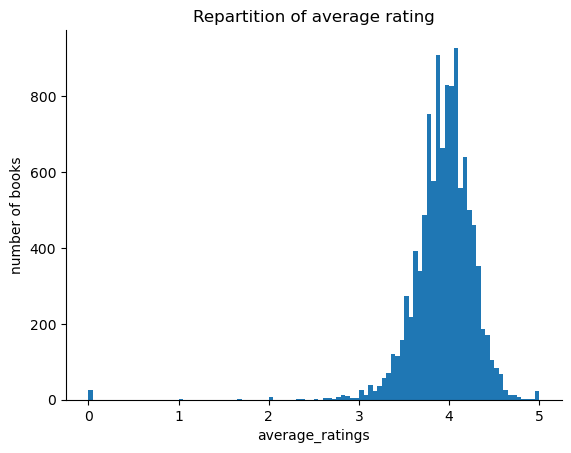

In [46]:
### Clemence ###

plt.hist(df['average_rating'],bins=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('average_ratings')
plt.ylabel('number of books')
plt.title('Repartition of average rating')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

-- Clemence --
The average rating is really imbalanced, most of the average rating is between 3.5 and 4.5. We have to take that into account for the data analysis and for the machine learning part. 

In [22]:
### Kheirie ### 
# use pd.cut and value_counts to get more insights into average rating by putting them into categories
# Categori

# Define bins and labels
bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Create a new column with the bin labels
rating_category = pd.cut(df['average_rating'], bins=bins, labels=labels, right=False)

# Count the number of ratings in each category
rating_counts_per_category = rating_category.value_counts()

# Display the result
print(rating_counts_per_category)

average_rating
3.5-4    5439
4-4.5    4724
3-3.5     649
4.5-5     208
2.5-3      48
0-1        26
2-2.5       8
1-1.5       2
1.5-2       1
Name: count, dtype: int64


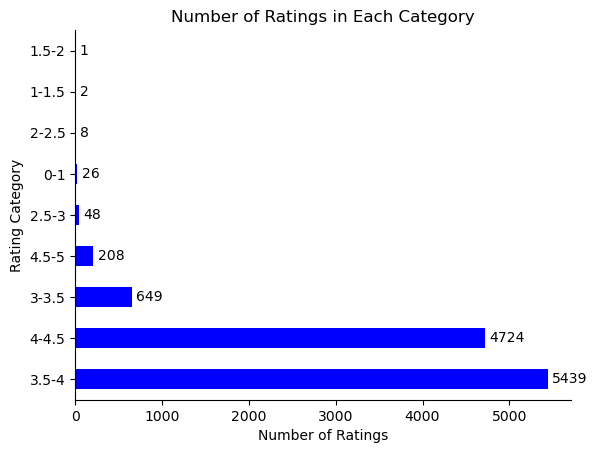

In [35]:
### Kheirie ### 
# Plot the total number of ratings belonging to each category 
# Plot the bar graph with different colors for each bar

# Plot the bar graph
ax = rating_counts_per_category.plot(kind='barh', color='Blue')

# Remove upper and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.ylabel('Rating Category')
plt.xlabel('Number of Ratings')
plt.title('Number of Ratings in Each Category')

# Display values next to each bar
for index, value in enumerate(rating_counts_per_category):
    plt.text(value + 50, index, str(value), ha='left', va='center')

# Show the plot
plt.show()

In [36]:
### Kheirie ###
# Further investigate the average_rating which are 0
print("number of average_rating wich are 0 is: ", len(df.query('average_rating == 0')))

number of average_rating wich are 0 is:  26


--- Kheirie --- 

This is the same number as the ratings between 0-1 , it is weird to have an average of 0

In [37]:
### Kheirie ### 
# look at the rows with average_rating which are 0
df.query('average_rating == 0')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,2001-09-01,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,2005-06-01,BradyGames
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,2000-10-13,Grove Press Open City Books
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,2004-01-01,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,2003-01-01,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1996-01-01,"Izdavačka agencija ""Draganić"""
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,1992-08-20,Macmillan
4242,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1983-01-01,Salem Press Inc
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,2002-11-08,Routledge
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,0916724948,9780916724948,eng,63,0,0,1997-12-31,Arts Publications


--- Kheirie --- 

Looking at the above data, one can notice that the books with average_rating of 0 received no ratings (ratings_count and text_review_counts are 0 except on location index 1092 the text_review_counts is 1). **One solution to see if these data can be complimented using the extra resources Hanna gave us.** This can be applied to all books that have very few ratings. Perhpas this might solve the imbalance problem. 

### Number of Pages

In [42]:
### Kheirie ###
# use describe to get a general information of the num_pages
# prefer to use it again throughout the code so that not to keep going up to check
# we can remove it later
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

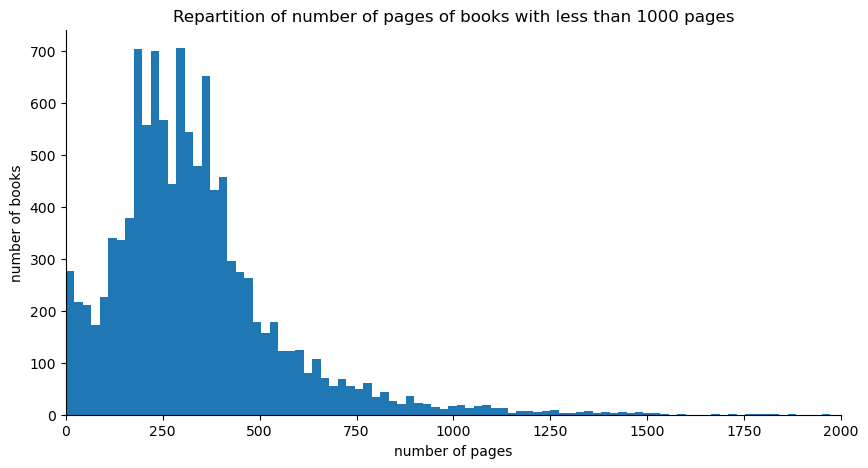

In [45]:
### Clemence ###
plt.figure(figsize=(10,5))
plt.hist(df['num_pages'],bins=300)
plt.xlabel('number of pages')
plt.ylabel('number of books')
plt.xlim(0,2000)
plt.title('Repartition of number of pages of books with less than 1000 pages') ### Kheirie : I do not understand the title, the graph shows also pages more than 1000
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [62]:
### Kheirie ### 
# check how many books have very high, very low and zero number of pages
print("number of books with pages more than 5000 is: ", len(df.query('num_pages >= 5000')))
print("number of books with pages between 2000 and 5000 is: ", len(df.query('2000 <= num_pages < 5000')))
print("number of books with pages between 1000 and 2000 is: ", len(df.query('1000 <= num_pages < 2000')))
print("number of books with pages between 5 and 10 is: ", len(df.query('5 <= num_pages < 10')))
print("number of books with pages less that 5 is: ", len(df.query('num_pages <= 5')))
print("number of books with zero pages are: ", len(df.query('num_pages == 0')))

number of books with pages more than 5000 is:  1
number of books with pages between 2000 and 5000 is:  11
number of books with pages between 1000 and 2000 is:  205
number of books with pages between 5 and 10 is:  63
number of books with pages less that 5 is:  148
number of books with zero pages are:  76


#### Link between average rating and number of pages

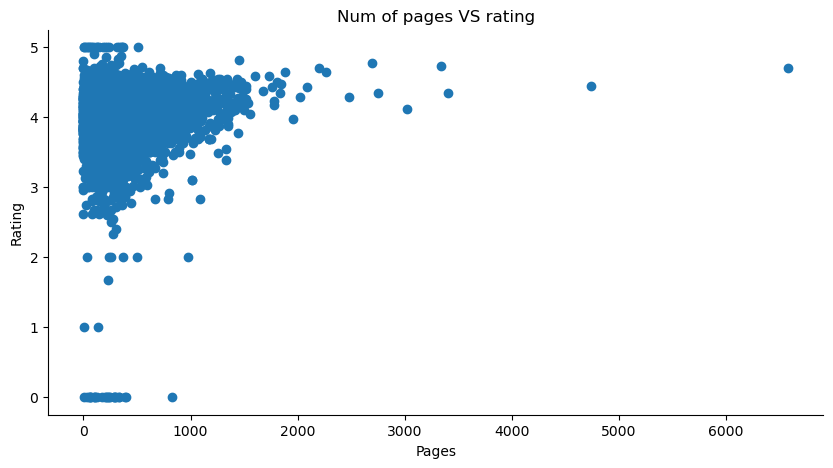

In [72]:
### Clemence ###

plt.figure(figsize=(10,5))
plt.scatter(df['num_pages'],df['average_rating'])
plt.title("Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

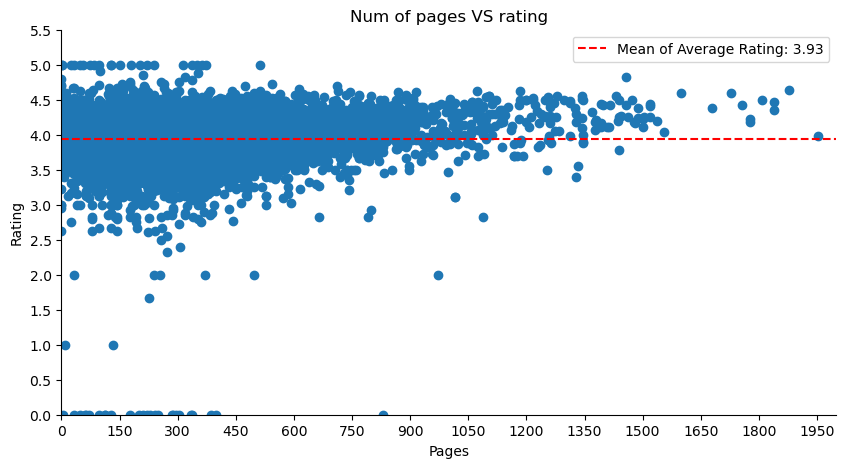

In [78]:
### Clemence ###
# Let's see this graph without all the extreme values by reducing the limits
mean_rating = df['average_rating'].mean()

plt.figure(figsize=(10,5))
plt.scatter(df['num_pages'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("Num of pages VS rating")
plt.xlabel("Pages")
plt.xlim(0,2000)
plt.ylabel("Rating")
plt.ylim(2.2,5)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, 2001, 150)) 
plt.yticks(np.arange(0, 6.0, 0.5)) 
plt.show()

--- Kheirie --- 

The relationship between the number of pages and ratings can not be clearly infered from the above plots, but we notice that books with less than 450 pages got highest ratings (almost 5), and very large books do not have low ratings. 

#### Link between text review counts, rating counts and number of pages

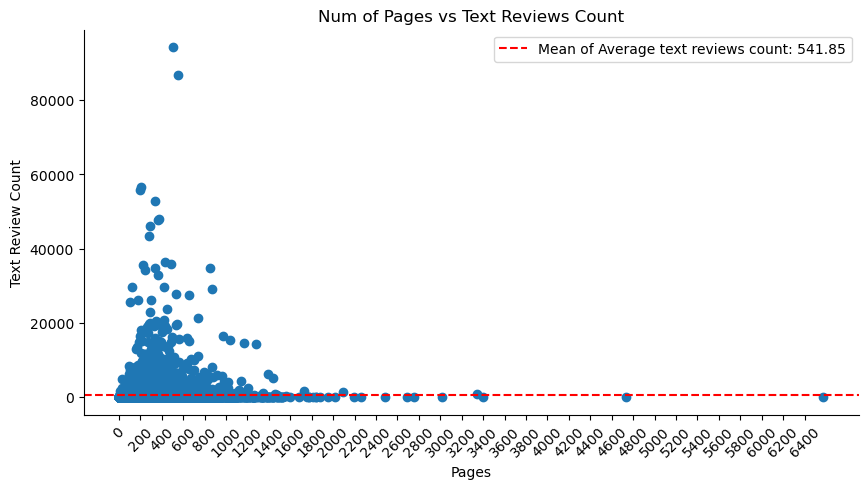

In [110]:
# Kheirie
mean_text_rev_count = df['text_reviews_count'].mean()

plt.figure(figsize=(10,5))
plt.axhline(y=mean_text_rev_count, color='red', linestyle='--', label=f'Mean of Average text reviews count: {mean_text_rev_count:.2f}')
plt.scatter(df['num_pages'],df['text_reviews_count'])
plt.title("Num of Pages vs Text Reviews Count")
plt.xlabel("Pages")
plt.ylabel("Text Review Count")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, max(df['num_pages']) + 1, 200), rotation=45) 
plt.legend()

plt.show()

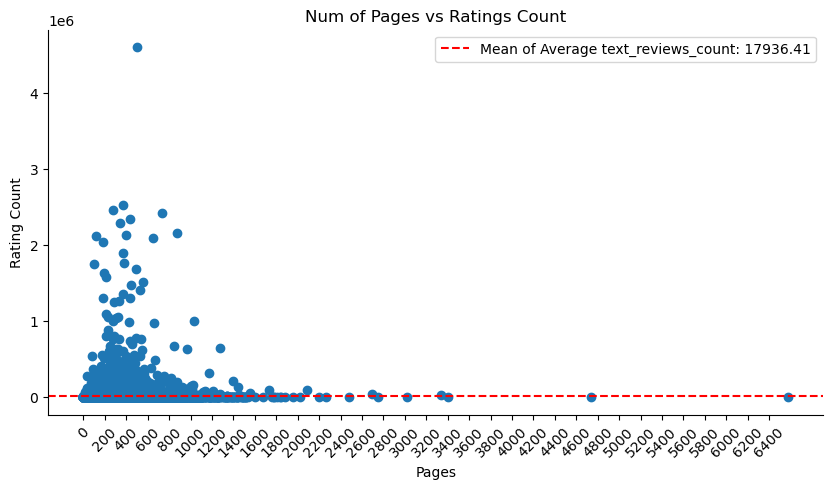

In [109]:
# Kheirie
mean_ratings_count = df['ratings_count'].mean()

plt.figure(figsize=(10,5))
plt.axhline(y=mean_ratings_count, color='red', linestyle='--', label=f'Mean of Average text_reviews_count: {mean_ratings_count:.2f}')
plt.scatter(df['num_pages'],df['ratings_count'])
plt.title("Num of Pages vs Ratings Count")
plt.xlabel("Pages")
plt.ylabel("Rating Count")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, max(df['num_pages']) + 1, 200), rotation=45) 
plt.legend()

plt.show()

#### Books with Zero or few pages

In [112]:
### Clemence ###
df.loc[df['num_pages']==0,:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,2005-01-01,Moody Publishers
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,2003-01-01,Tantor Media
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,2006-10-03,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,2003-10-01,Simon & Schuster Audio
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,2006-03-28,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10030,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,2005-01-01,Tantor Media
10192,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,1995-11-19,Random House Value Publishing
10624,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,1999-12-01,Simon & Schuster Audio
10926,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,1981-10-12,Ivy Books


In [113]:
### Clemence ###
few_pages=df.loc[df['num_pages']<20,:] #there seems to be a lot of books with very few pages, we'll see them in more details

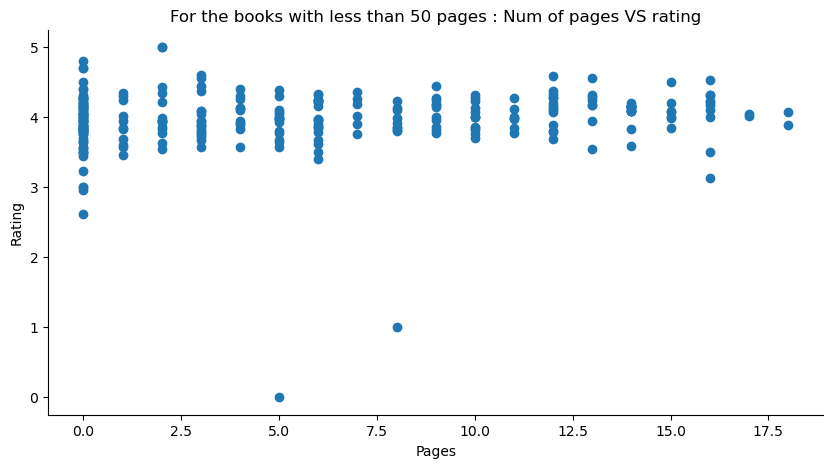

In [114]:
### Clemence ###
plt.figure(figsize=(10,5))
plt.scatter(few_pages['num_pages'],few_pages['average_rating'])
plt.title("For the books with less than 50 pages : Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [115]:
### Clemence ###
few_pages.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
40,68,The Known World,Edward P. Jones/Kevin R. Free,3.83,006076273X,9780060762735,en-US,14,55,12,2004-06-15,HarperAudio
7615,29260,Finding and Exploring Your Spiritual Path: An ...,Ram Dass/Richard Alpert,3.95,0940687569,9780940687561,eng,0,21,1,1989-05-15,Macmillan Audio
3571,12964,Much Ado about Nothing,William Shakespeare/Samuel West/Amanda Root/Ar...,4.07,1932219250,9781932219258,eng,18,38,7,2005-11-30,BBC Audiobooks America
2110,7608,Lolita,Vladimir Nabokov/Jeremy Irons,3.89,0739322060,9780739322062,eng,12,787,239,2005-04-26,Random House Audio
9040,35218,There Was a Cold Lady Who Swallowed Some Snow!,Lucille Colandro/Jared Lee/Skip Hinnant,3.85,0439895561,9780439895569,eng,1,14,1,2006-08-13,Scholastic Audio Books
5807,21759,Tripwire (Jack Reacher #3),Lee Child/Dick Hill,4.09,1593555601,9781593555603,eng,14,11,1,2004-11-25,Brilliance Audio
5781,21703,The Best American Mystery Stories 2002,James Ellroy/Otto Penzler/John Biguenet/Michae...,3.58,0618258078,9780618258079,eng,1,0,0,2002-10-15,Mariner Books
4526,16313,A Caribbean Mystery,Agatha Christie/Rosalind Ayres,3.80,1572705493,9781572705494,eng,0,49,10,2006-10-09,Audiogo
6190,23293,Dubliners,James Joyce/Frank McCourt/Donal Donnelly/Ciara...,3.85,0060789565,9780060789565,eng,8,53,11,2005-05-10,Caedmon
3693,13383,Vinyl Cafe Coast to Coast Story Service,Stuart McLean,4.45,0968303188,9780968303184,eng,3,51,1,2005-07-15,Canadian Broadcasting Corporation (CBC Audio)


-- Clemence --

It's hard to believe than that there is that much books with less than 50 pages (especially those with less than 10 pages !) with those high ratings. There must be errors in the data.

By looking quickly at the first few lines, there is well known book there, that should have more than 20 pages.

##### One possible explanation : Audio collection

The data analysis showed that there is Audiobook on the file, so the number of pages is irrelevant for those lines.

In [62]:
### Clemence ###
df.loc[df['authors']=='NOT A BOOK',:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
5476,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5477,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
5478,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


In [63]:
### Clemence ###
df.loc[(df['title'].str.contains('Audio', case=False)),:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1325,4651,The Ernest Hemingway Audio Collection,Ernest Hemingway/Charlton Heston,4.30,0694524980,9780694524983,en-US,4,43,6,5/8/2001,Caedmon
1842,6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
5947,22337,The Neil Gaiman Audio Collection,Neil Gaiman,4.24,0060732989,9780060732981,eng,1,1666,208,8/31/2004,HarperFestival
6354,23922,The Edgar Allan Poe Audio Collection,Edgar Allan Poe,4.39,0694524190,9780694524198,eng,5,289,64,10/1/2000,Harper Audio
7446,28585,Judge Dredd (Audio Cassette),Neal Barrett Jr./Martha Banta,2.96,0553476793,9780553476798,eng,0,6,0,7/1/1995,Random House Audio
11008,45161,The Roald Dahl Audio Collection,Roald Dahl,4.41,0061214965,9780061214967,en-US,4,199,36,2/20/2007,HarperCollins Publishers


-- Clemence --
The audio explanation explains only 11 books

--- Clemence Proposition ---

<font color='red' style='font-size: 20px;'>Proposition : to deal with this error (books with less than 20 pages) we could replace those with the "new mean" = the mean without all the fewer pages books. I proposed 20 pages arbitrarily because for amazon self-publishing books, the minimum page count to print them is 24 pages </font>
https://kdp.amazon.com/en_US/help/topic/G201857950

--- Kheirie Proposition ---

Look first into the resources Hanna gave to see if we can compliment the data

### Number of ratings and reviews

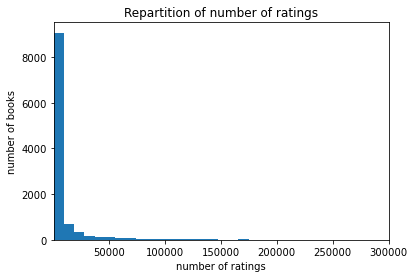

In [114]:
### Clemence ###

plt.hist(df['ratings_count'],bins=500)
plt.xlim(100,300000) #I had y limits to have a better view
plt.xlabel('number of ratings')
plt.ylabel('number of books')
plt.title('Repartition of number of ratings')
plt.show() 

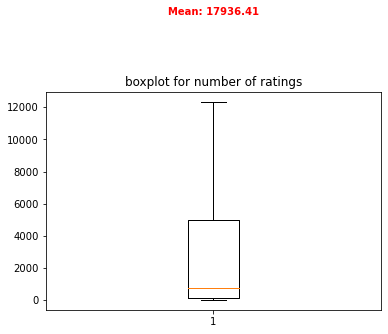

In [128]:
### Clemence ###

plt.boxplot(df['ratings_count'], 0, '')
plt.title('boxplot for number of ratings')
mean_value = df['ratings_count'].mean()
plt.text(1, mean_value, f'Mean: {mean_value:.2f}', ha='center', va='center', color='red', fontweight='bold')
plt.show()

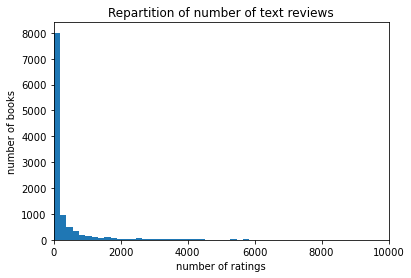

In [115]:
### Clemence ###

plt.hist(df['text_reviews_count'],bins=500)
plt.xlabel('number of ratings')
plt.xlim(0,10000)
plt.ylabel('number of books')
plt.title('Repartition of number of text reviews')
plt.show()

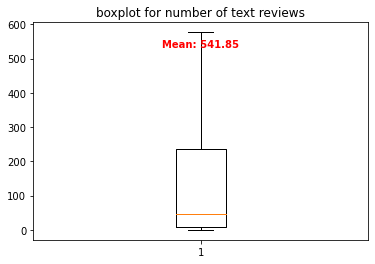

In [127]:
### Clemence ###

plt.boxplot(df['text_reviews_count'], 0, '')
plt.title('boxplot for number of text reviews')
mean_value = df['text_reviews_count'].mean()
plt.text(1, mean_value, f'Mean: {mean_value:.2f}', ha='center', va='center', color='red', fontweight='bold')
plt.show()

The vast majority of books don't have a lot of ratings or text reviews but there is some hight extremes that influences the mean.

In [133]:
### Clemence ####
df.nlargest(10, 'text_reviews_count') #Lest look at the higher number of text review

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5272,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins
10704,43641,Water for Elephants,Sara Gruen,4.09,1565125606,9781565125605,eng,335,1260027,52759,5/1/2007,Algonquin Books
7312,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
5409,19501,Eat Pray Love,Elizabeth Gilbert,3.55,0143038419,9780143038412,eng,368,1362264,47620,2/1/2007,Riverhead Books
2060,7445,The Glass Castle,Jeannette Walls,4.27,074324754X,9780743247542,eng,288,808656,46176,1/17/2006,Scribner
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


In [134]:
### Clemence ####
df.nlargest(10, 'ratings_count') #Lest look at the higher number of text review

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


--- Clemence ---

Those books are really well known books so even if those are extreme values, they seems to be coherent.

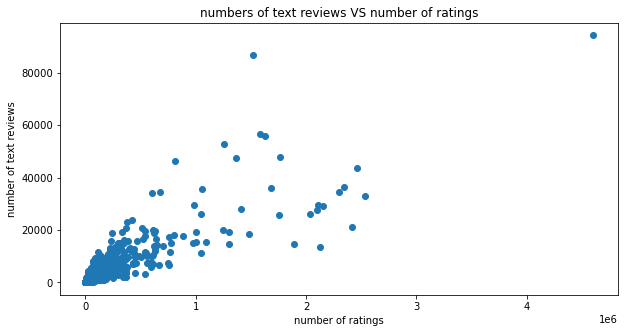

In [110]:
### Clemence ###


plt.figure(figsize=(10,5))
plt.scatter(df['ratings_count'],df['text_reviews_count'])
plt.title("numbers of text reviews VS number of ratings")
plt.xlabel("number of ratings")
plt.ylabel("number of text reviews")
plt.show()

In [136]:
### Clemence ###
print('The correlation between number or ratings and number of text reviews is',df['ratings_count'].corr(df['text_reviews_count']))

The correlation between number or ratings and number of text revienws is 0.8659786568124839


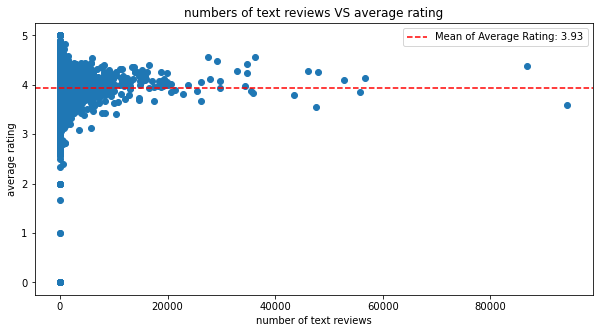

In [148]:
### Clemence ###
mean_rating = df['average_rating'].mean()
plt.figure(figsize=(10,5))
plt.scatter(df['text_reviews_count'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("numbers of text reviews VS average rating")
plt.xlabel("number of text reviews")
plt.ylabel("average rating")
plt.legend()
plt.show()

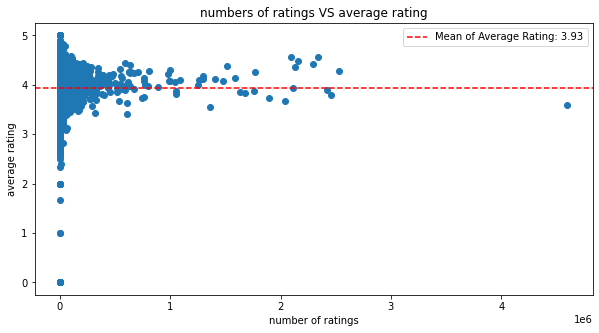

In [150]:
### Clemence ###
mean_rating = df['average_rating'].mean()
plt.figure(figsize=(10,5))
plt.scatter(df['ratings_count'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("numbers of ratings VS average rating")
plt.xlabel("number of ratings")
plt.ylabel("average rating")
plt.legend()
plt.show()

--- Clemence ---

Number of ratings and number of reviews are correlated between eachother. There seems to be a link between number of reviews and rating, and the average rating, as books with a lot of ratings or reviews have a better average rating. 

### Titles

In [189]:
### Kheirie ###
# Check if the titles have dupliactes 
# first clean the title column - remove all punctuations and convert to lower case
df['clean_title'] = df['title'].str.replace('[^\w\s\d]', '', regex=True) # remove all punctuations - keeps numbers, letters and spaces in text
df['clean_title'] = df['title'].str.lower() # convert to lower case
df['clean_title']


0        harry potter and the half-blood prince (harry ...
1        harry potter and the order of the phoenix (har...
2        harry potter and the chamber of secrets (harry...
3        harry potter and the prisoner of azkaban (harr...
4        harry potter boxed set  books 1-5 (harry potte...
                               ...                        
11122     expelled from eden: a william t. vollmann reader
11123                          you bright and risen angels
11124                      the ice-shirt (seven dreams #1)
11125                                          poor people
11126                          las aventuras de tom sawyer
Name: clean_title, Length: 11127, dtype: object

In [215]:
### Kheirie ###
# Check for duplicates in a specific column using value_counts
duplicates_count = df['clean_title'].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(duplicates_count[duplicates_count > 1])

clean_title
the iliad                                                      9
the brothers karamazov                                         9
'salem's lot                                                   8
gulliver's travels                                             8
anna karenina                                                  8
                                                              ..
a passage to india                                             2
shield of thunder (troy  #2)                                   2
wide sargasso sea                                              2
harry potter and the prisoner of azkaban (harry potter  #3)    2
harry potter and the chamber of secrets (harry potter  #2)     2
Name: count, Length: 511, dtype: int64


--- Kheirie --- 

According to the above data, there are 511 books that have duplicates - i.e. that in the table two rows can can represent the same book

Let's further look in depth at some of these books, to understand why there are duplicates

In [197]:
df.query("clean_title == 'harry potter and the chamber of secrets (harry potter  #2)'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,harry potter and the chamber of secrets (harry...
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,harry potter and the chamber of secrets (harry...


In [198]:
df.query("clean_title == 'harry potter and the prisoner of azkaban (harry potter  #3)'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,harry potter and the prisoner of azkaban (harr...
1233,4256,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,074757362X,9780747573623,eng,480,3141,140,2008-07-01,Bloomsbury UK,harry potter and the prisoner of azkaban (harr...


In [199]:
df.query("clean_title == 'the iliad'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,1999-04-29,Penguin Classics,the iliad
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,2004-04-03,Farrar Straus and Giroux,the iliad
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,2003-01-30,Penguin Classics,the iliad
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,1999-08-01,Signet Classics,the iliad
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,1992-03-19,Everyman,the iliad
3356,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,2006-06-15,Penguin-HighBridge,the iliad
5906,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,1999-10-28,John Wiley & Sons,the iliad
8537,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,2011-09-01,Collector's Library,the iliad
8539,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,2000-09-15,Kingfisher,the iliad


In [200]:
df.query("clean_title == 'the brothers karamazov'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
1406,4933,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Manuel Ko...,4.32,0451527348,9780451527349,eng,736,983,91,1999-06-01,Signet Classics,the brothers karamazov
1407,4934,The Brothers Karamazov,Fyodor Dostoyevsky/Fyodor Dostoevsky/Richard P...,4.32,0374528373,9780374528379,eng,796,191531,6795,2002-06-14,Farrar Straus and Giroux,the brothers karamazov
1408,4935,The Brothers Karamazov,Fyodor Dostoyevsky/David McDuff,4.32,0140449248,9780140449242,eng,1013,1673,184,2003-02-27,Penguin Books Ltd,the brothers karamazov
1409,4936,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0679729259,9780679729259,eng,796,617,80,1991-09-03,Vintage Books USA,the brothers karamazov
1410,4938,The Brothers Karamazov,Fyodor Dostoyevsky/Simon Vance/Thomas R. Beyer...,4.32,1596440791,9781596440791,eng,16,20,2,2005-05-01,Hovel Audio,the brothers karamazov
1411,4940,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Maire Jaanus,4.32,159308045X,9781593080457,eng,720,1089,202,2004-07-25,Barnes Noble Classics,the brothers karamazov
1634,5691,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0099922800,9780099922803,eng,796,443,55,1992-01-16,Vintage Classics,the brothers karamazov
1990,7135,The Brothers Karamazov,Fyodor Dostoyevsky/Andrew R. MacAndrew/Konstan...,4.32,0553212168,9780553212167,eng,1072,1022,154,1984-04-01,Bantam Classics,the brothers karamazov
9356,37058,The Brothers Karamazov,Fyodor Dostoyevsky/Thomas R. Beyer Jr./Simon V...,4.32,1596440783,9781596440784,eng,16,3,1,2005-05-01,Hovel Audio,the brothers karamazov


--- Kheirie --- 

We can see that even these books have the same title, but they differ in other features as publication date, authors, publishers, num_pages. **However, what is very interesting is that they all have the same average_rating i.e. books with same titles hold the same average_rating even if they differ in other features** 

In [213]:
### Kheirie ### 
# Investigate more to make sure what is noticed previously is true

# Group by 'clean_title' and count the number of unique 'average_rating'
ratings_count_by_title = df.groupby('clean_title')['average_rating'].nunique() #nunique counts the number of unique elemnts

duplicates_count_by_title = ratings_count_by_title[ratings_count_by_title > 1] # get titles that have 2 or more different ratings
print(duplicates_count_by_title)

clean_title
'salem's lot           2
1776                   2
a little princess      2
a matter of trust      2
alice in wonderland    2
                      ..
the stranger           2
the tale of genji      2
trainspotting          2
v for vendetta         2
white fang             2
Name: average_rating, Length: 65, dtype: int64


--- Kheirie --- 

This tells us that not all books with the same titles have the same ratings

In [217]:
### Kheirie ### 
duplicates_count_by_title.value_counts()

average_rating
2    59
3     3
4     2
6     1
Name: count, dtype: int64

--- Kheirie --- 

The value_counts tells us that there are 59 books of the same title that exhibit 2 different ratings, 3 that exhibit 3 different ratings, 2 that have 4 different ratings and 1 with 6 different ratings 

In [219]:
### Kheirie ### 
df.query('clean_title == "a little princess"') # change title name to look at different samples

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
914,3008,A Little Princess,Frances Hodgson Burnett/Nancy Bond,4.20,0142437018,9780142437018,eng,242,238192,4392,2002-02-26,Penguin Books,a little princess
9682,38643,A Little Princess,Frances Hodgson Burnett/Scott McKowen,4.20,1402714548,9781402714542,en-GB,208,500,54,2004-10-01,Sterling,a little princess
9683,38647,A Little Princess,Tania Zamorsky/Frances Hodgson Burnett/Lucy Co...,4.16,1402712758,9781402712753,eng,160,3784,84,2005-03-01,Sterling,a little princess


--- Kheirie --- 

Kheirie stopped here :) Have to think on how to handle duplicate titles, especially those that have exactly the same average_rating. Do we keep them all? Do we merge some of them? Do we drop some of them ? .... 